# House Price
The general description is [here!](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Reading the CSV file

df1 = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test1 = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
# Checking the correlations between features

df1_corr = df1.corr()
df1_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [5]:
# Rank the correlation between the features and target (SalePrice)

df1_corr_order = df1_corr.iloc[37,:].sort_values(ascending = False)
df1_corr_order.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

It looks like the correlation of these values are higher than 0.6.

[OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF]

They seem to strongly correlate to the target (SalePrice)!

Also, GrLivArea, GarageCars, GarageArea are describing the similar feature of the  garage, so **I could potentially only use the highest feature which is GrLivArea**.

**Same thing can be said of TotalBsmtSF and 1stFlrSF**, because basically the basement square feet and 1st floor square feet are the same/similar.

Thus, I'm going to call OverallQual, GrLivArea, and TotalBsmtSF **"Strong Features"** and heavily use them to predict SalePrice.

In [6]:
#Dropping SalePrice from train data

df1_saleprice = df1["SalePrice"]
df2 = df1.drop("SalePrice", axis = 1)

Now, I'm going to concatenate the train data and test data here.  
Though it's supposed to be engineered saparetely, this won't significantly affect the result, and it makes this analysis easy to see.

In [7]:
# Concating df2 and df_test1

df_concat1 = pd.concat([df2, df_test1], axis = 0, ignore_index = True)

In [8]:
# Dropping "Id"

df_concat2 = df_concat1.drop("Id",1)

# ◆Checking null values

In [9]:
# Checking Null values

null_numbers_40 = df_concat2.isnull().sum().sort_values(ascending = False).head(40)
null_perc_40 = 100 * null_numbers_40 / 2919
null_number_perc_40 = pd.concat([null_numbers_40, null_perc_40],axis = 1, keys = ["Null","Perc"])
null_number_perc_40

,Null,Perc
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


I'm going to delete the values with higher than 15% number of Null values, because they don't have a strong impact on the result. 

Also,**GarageCond, GarageQual, GarageYrBlt, GarageFinish, GarageType** are all about the garage, and **BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2,BsmtFinType1** are about the basement.  
As shown and mentioned earlier, GrLivArea and TotalBsmtSF have a strong correlation to SalePrice, so I'm only using these features, and dropping the others about the garage and the basement with a lot of Null values.

In [10]:
# Dropping the features mentioned above (Null % is higher than 2%). 

df_concat3 = df_concat2.drop(null_number_perc_40[null_number_perc_40["Perc"] > 2].index, 1)

# ◆Relationship between "Strong Features"

Next, I'm going to check the relationship between Saleprice and the "Strong Features"(OverallQual, GrLivArea, and TotalBsmtSF).  
(Here I'm using the data frame before concatenation(df2) because it is connected to SalePrice)

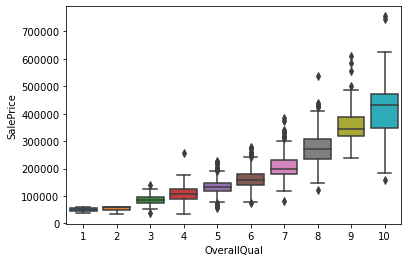

In [11]:
# OverallQual and SalePrice

sns.boxplot(x = df2["OverallQual"], y= df1_saleprice)

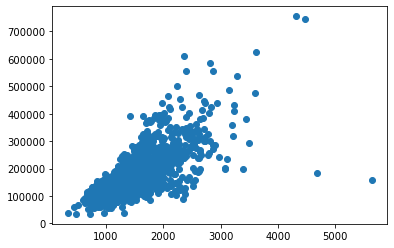

In [12]:
# GrLivArea and SalePrice

plt.scatter(df2["GrLivArea"], df1_saleprice)

Here I can tell that there are 2 outliers which have GrLivArea which is too big for the price.   
It could be a warehouse or something.

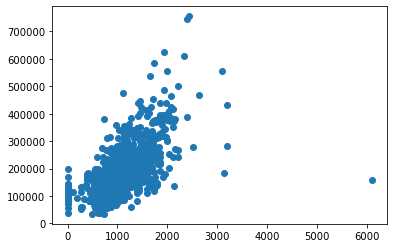

In [13]:
# TotalBsmtSF and SalePrice

plt.scatter(df2["TotalBsmtSF"], df1_saleprice)

Here I can see another outlier with too big of a basement for the price.
Again, this could be a warehouse or something with a really big basement, and potentially this could be the same value as the one mentioned above about GrLivArea.

# ◆Eliminating the outliers

In [14]:
# Checking the outlier of GrLivArea

df2["GrLivArea"].sort_values(ascending = False).head(10)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
185     3608
304     3493
1268    3447
635     3395
769     3279
Name: GrLivArea, dtype: int64

In [15]:
# Checking the outlier of TotalBsmtSF

df2["TotalBsmtSF"].sort_values(ascending = False).head(10)

1298    6110
332     3206
496     3200
523     3138
440     3094
1373    2633
1044    2524
691     2444
1182    2396
224     2392
Name: TotalBsmtSF, dtype: int64

Now I can tell that value 1298 has too big of a GrLivArea and TotalBsmtSF, and value 523 has too big of a GrLivArea,  
so I'm going to eliminate these values (from the concatrated data).  

Also, I'm going to do the same thing to Saleprice(df1_saleprice) because its length should be the same as the train data in the end. 

In [16]:
# Eliminating value 1298 and 523 from the concatrated data and Saleprice

df_concat4 = df_concat3.drop(df_concat3.iloc[[1298,523],:].index)
df1_saleprice2 = df1_saleprice.drop([1298,523])

I'm going to check if outliers are deleted from concatenated dataframe.

In [17]:
# Checking GrLivArea

df_concat4["GrLivArea"].sort_values(ascending = False)

2549    5095
1182    4476
691     4316
2188    3820
2822    3672
        ... 
2785     492
916      480
1100     438
2098     407
533      334
Name: GrLivArea, Length: 2917, dtype: int64

In [18]:
# Checking TotalBsmtSF

df_concat4["TotalBsmtSF"].sort_values(ascending = False)

2549    5095.0
332     3206.0
496     3200.0
440     3094.0
1479    2846.0
         ...  
2387       0.0
553        0.0
1412       0.0
1218       0.0
2120       NaN
Name: TotalBsmtSF, Length: 2917, dtype: float64

It looks like the first one (2549) still looks like an outlier, but this is from the test data whose row shouldn't be deleted,   
so I'm going to leave this here.

# ◆Transforming strong features 

Next, I'm going to check if strong features are close to normal distribution or not.

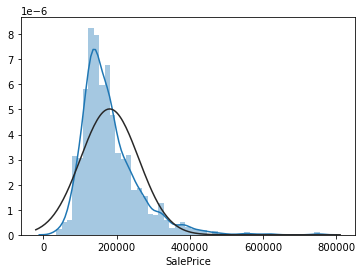

In [19]:
# Saleprice's distribution and probplot

sns.distplot(df1_saleprice2, fit = norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

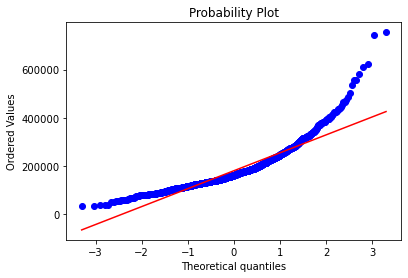

In [20]:
stats.probplot(df1_saleprice2, plot = plt)

It's not really looking like a normal distribution.  
For making it look like a normal distribution, I'm going to take log of Saleprice.

In [21]:
# Taking log of Saleprice

df1_saleprice3 = np.log(df1_saleprice2)  

Checking how the saleprice looks now.

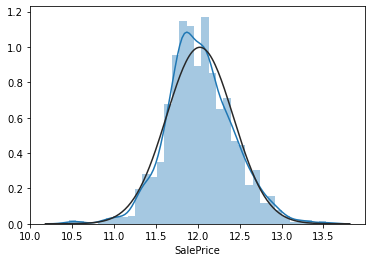

In [22]:
sns.distplot(df1_saleprice3, fit = norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3985320692976512, 12.024008660964794, 0.9953918648311367))

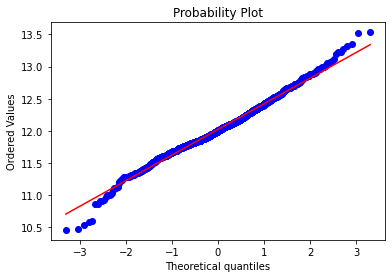

In [23]:
stats.probplot(df1_saleprice3, plot = plt)

Seemls like the saleprice looks like a normal distribution now!

Next, I'm going to check the GrLivArea too. 

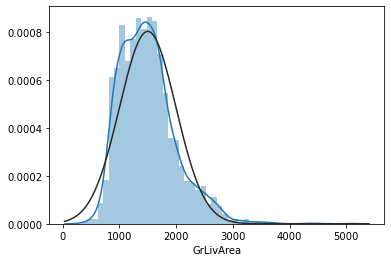

In [24]:
# GrLivArea's distribution and probability plot.

sns.distplot(df_concat4["GrLivArea"], fit = norm)

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([ 334,  407,  438, ..., 4316, 4476, 5095])),
 (483.620471204401, 1498.2516283853274, 0.972374518285359))

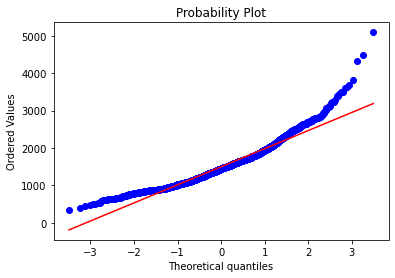

In [25]:
stats.probplot(df_concat4["GrLivArea"], plot = plt)

It doesn't look like a normal distribution either, so I'm going to take log of GrLivArea too.

In [26]:
df_concat4["GrLivArea"] = np.log(df_concat4["GrLivArea"])  

Checking how the GrLivArea looks now.

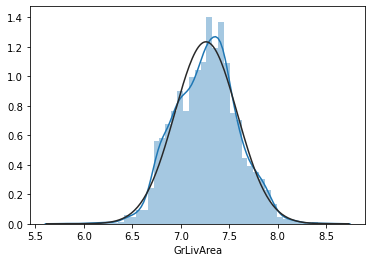

In [27]:
sns.distplot(df_concat4["GrLivArea"], fit = norm)

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([5.81114099, 6.00881319, 6.08221891, ..., 8.37008433, 8.40648507,
         8.53601495])),
 (0.3231691749794683, 7.259882015804195, 0.9985345032541885))

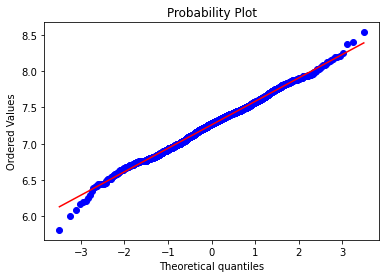

In [28]:
stats.probplot(df_concat4["GrLivArea"], plot = plt)

It was successfully changed!

Now I'm going to check the TotalBsmtSF.

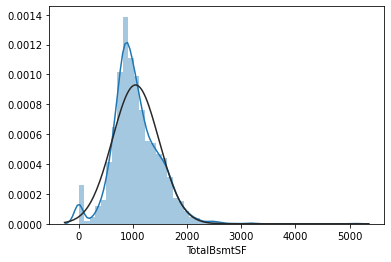

In [29]:
# TotalBsmtSF's distribution and probability plot.

sns.distplot(df_concat4["TotalBsmtSF"], fit = norm)

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([   0.,    0.,    0., ..., 3206., 5095.,   nan])),
 (nan, nan, nan))

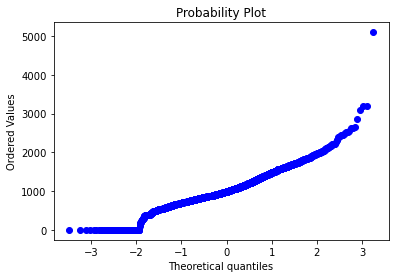

In [30]:
stats.probplot(df_concat4["TotalBsmtSF"], plot = plt)

I want to take log of this too, but looks like zero values are included here(some houses must not have any basements), so I can't do that.    
Thus, I'm going to only use the data which is bigger than 0.

In [31]:
# Creating an array consisting of the values which are bigger than 0 in TotalBsmtSF

WithBsmt1 = df_concat4["TotalBsmtSF"][df_concat4["TotalBsmtSF"] > 0]

In [32]:
# Checking the minimum value is bigger than 0

WithBsmt1.min()

105.0

Now I'm going to transform WithBsmt1 by taking log of it

In [33]:
#Taking log

WithBsmt2 = np.log(WithBsmt1)

((array([-3.48703022, -3.24233598, -3.10696736, ...,  3.10696736,
          3.24233598,  3.48703022]),
  array([4.65396035, 5.07517382, 5.15329159, ..., 8.07090609, 8.07277933,
         8.53601495])),
 (0.371551385150158, 6.915961728013744, 0.9912731991973128))

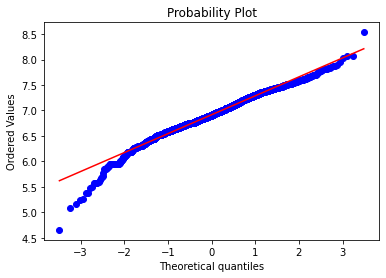

In [34]:
# Checking the probplot

stats.probplot(WithBsmt2, plot = plt)

It looks like it was successfuly transformed.    
  
Now I'm going to put this back to the original data frame.

In [35]:
df_concat4[df_concat4["TotalBsmtSF"] > 0].loc[:, "TotalBsmtSF"] = WithBsmt2

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# ◆One-hot encoding

Now I'm going to encode the categorical features using get_dummies.

In [36]:
df_concat5 = pd.get_dummies(df_concat4)

# ◆Splitting the data into train and test data

Now I have to split this concatrated data into 2 groups, as in train and test groups.

It was really short, so I feel bad to interrupt and have them get separated. I hope they had really good time, and don't want them to hate me.


First of all, I'm going to check the length of the original train data.

In [37]:
len(df1 )

1460

I eliminated 2 rows at the outliers section, so it's going to be 1458 rows. 

In [38]:
len(df_concat5)

2917

In [39]:
# Separating the concatrated data into train data and test data

sep_train_df = df_concat5.iloc[:1458,:]
sep_test_df = df_concat5.iloc[1458:,:]

In [40]:
#Checking the length of separated data

len(sep_train_df)

1458

In [41]:
len(sep_test_df)

1459

# ◆Using light GBM to predict the Saleprice

I have finished the preprocessing, and now finally I'm going to use machine learning to predict the saleprice.  
Here, I'm going to use light GBM. 

In [42]:
# Spliting the data 

X_train, X_test, y_train, y_test = train_test_split(sep_train_df,df1_saleprice3,random_state = 0, test_size = 0.2)

In [43]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

I'm going to check what the best parameter is.

In [44]:
# Checking the best max_depth

max_depth_list = np.arange(2,22,2)

for i in max_depth_list:
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : i}
    
    gbm = lgb.train(params,
               lgb_train,
               valid_sets = lgb_test,
               num_boost_round = 5000,
               early_stopping_rounds = 100,
                verbose_eval = 50
                )

Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.131098
[100]	valid_0's rmse: 0.118845
[150]	valid_0's rmse: 0.115252
[200]	valid_0's rmse: 0.113691
[250]	valid_0's rmse: 0.112933
[300]	valid_0's rmse: 0.112388
[350]	valid_0's rmse: 0.112029
[400]	valid_0's rmse: 0.112103
[450]	valid_0's rmse: 0.111959
Early stopping, best iteration is:
[364]	valid_0's rmse: 0.111875
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.119191
[100]	valid_0's rmse: 0.115318
[150]	valid_0's rmse: 0.11432
[200]	valid_0's rmse: 0.11354
[250]	valid_0's rmse: 0.113052
[300]	valid_0's rmse: 0.113549
Early stopping, best iteration is:
[247]	valid_0's rmse: 0.112882
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.117055
[100]	valid_0's rmse: 0.115636
[150]	valid_0's rmse: 0.115946
[200]	valid_0's rmse: 0.116104
Early stopping, best iteration is:
[104]	valid_0's rmse: 0.115576
Training until validation scores

Looks like when the max_depth is 2, I can get the best result.

In [45]:
# Checking the best early_stopping_rounds

early_stopping_rounds_list = np.arange(100,501,100)

for i in early_stopping_rounds_list:
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : 2}
    
    gbm = lgb.train(params,
               lgb_train,
               valid_sets = lgb_test,
               num_boost_round = 5000,
               early_stopping_rounds = i,
                verbose_eval = 50
                )

Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.131098
[100]	valid_0's rmse: 0.118845
[150]	valid_0's rmse: 0.115252
[200]	valid_0's rmse: 0.113691
[250]	valid_0's rmse: 0.112933
[300]	valid_0's rmse: 0.112388
[350]	valid_0's rmse: 0.112029
[400]	valid_0's rmse: 0.112103
[450]	valid_0's rmse: 0.111959
Early stopping, best iteration is:
[364]	valid_0's rmse: 0.111875
Training until validation scores don't improve for 200 rounds
[50]	valid_0's rmse: 0.131098
[100]	valid_0's rmse: 0.118845
[150]	valid_0's rmse: 0.115252
[200]	valid_0's rmse: 0.113691
[250]	valid_0's rmse: 0.112933
[300]	valid_0's rmse: 0.112388
[350]	valid_0's rmse: 0.112029
[400]	valid_0's rmse: 0.112103
[450]	valid_0's rmse: 0.111959
[500]	valid_0's rmse: 0.111976
[550]	valid_0's rmse: 0.111807
[600]	valid_0's rmse: 0.11221
[650]	valid_0's rmse: 0.112687
[700]	valid_0's rmse: 0.112727
Early stopping, best iteration is:
[525]	valid_0's rmse: 0.111702
Training until validation scores d

From this, I can tell the best early_stopping_rounds are between 200 and 300, so I'm going to use 300. 

In [46]:
# Using those numbers as the parameters.

params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : 2}
gbm = lgb.train(params,
               lgb_train,
               valid_sets = lgb_test,
               num_boost_round = 5000,
               early_stopping_rounds =300,
                verbose_eval = 50
                )

Training until validation scores don't improve for 300 rounds
[50]	valid_0's rmse: 0.131098
[100]	valid_0's rmse: 0.118845
[150]	valid_0's rmse: 0.115252
[200]	valid_0's rmse: 0.113691
[250]	valid_0's rmse: 0.112933
[300]	valid_0's rmse: 0.112388
[350]	valid_0's rmse: 0.112029
[400]	valid_0's rmse: 0.112103
[450]	valid_0's rmse: 0.111959
[500]	valid_0's rmse: 0.111976
[550]	valid_0's rmse: 0.111807
[600]	valid_0's rmse: 0.11221
[650]	valid_0's rmse: 0.112687
[700]	valid_0's rmse: 0.112727
[750]	valid_0's rmse: 0.112964
[800]	valid_0's rmse: 0.113093
Early stopping, best iteration is:
[525]	valid_0's rmse: 0.111702


In [47]:
# Getting the predicted Saleprice from X_test

predicted = gbm.predict(X_test)

In [48]:
# Compare the predicted Saleprice and y_test

pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)],axis=1)
pred_df.columns = ["True", "Predicted"]
pred_df

,True,Predicted
0,11.884489,11.889518
1,12.133502,11.994283
2,11.379394,11.339058
3,11.917724,11.829859
4,12.676076,12.518444
...,...,...
287,12.004568,11.811192
288,11.881035,11.903409
289,11.867097,11.881898
290,11.362103,11.317587


In [49]:
# Checking the RMSE and R2_score

RMSE = np.sqrt(mean_squared_error(pred_df['True'], pred_df['Predicted']))
R2 = r2_score(pred_df['True'], pred_df['Predicted'])

Text(0.1, 0.8, 'R2 = 0.92638')

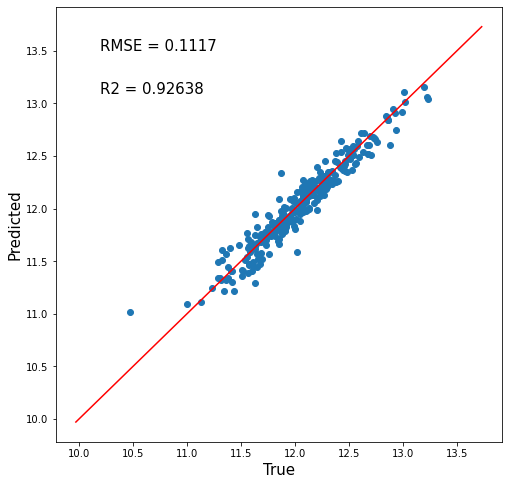

In [50]:
# Plotting the result

plt.figure(figsize = (8,8))
ax = plt.subplot(111)
ax.scatter(pred_df['True'], pred_df['Predicted'], marker = "o")
ax.set_xlabel("True", fontsize = 15)
ax.set_ylabel("Predicted", fontsize = 15)
x = np.linspace(pred_df['True'].min() - 0.5, pred_df['True'].max() + 0.5)
y = x
ax.plot(x,y, "r-")
plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))),transform=ax.transAxes,fontsize=15)
plt.text(0.1, 0.8, 'R2 = {}'.format(str(round(R2, 5))),transform=ax.transAxes,fontsize=15)

It looks like it's predicted well!

# ◆Making the submission

In [51]:
# Making the prediction from the separated test data

predicted_submission = gbm.predict(sep_test_df)

In [52]:
# Changing it to Series
 
predicted_submission_series =  pd.Series(data = predicted_submission)

In [53]:
# Getting the Id

df_test1["Id"]

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [54]:
# Making a dataframe for submission

submission_df = pd.concat([df_test1["Id"],predicted_submission_series], axis = 1, keys = ["Id","SalePrice"])

In [55]:
submission_df

,Id,SalePrice
0,1461,11.629607
1,1462,11.907805
2,1463,12.153578
3,1464,12.158869
4,1465,12.144141
...,...,...
1454,2915,11.290016
1455,2916,11.353718
1456,2917,12.038518
1457,2918,11.688148


In [56]:
submission_df.to_csv("Submission.csv", index = False)